In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.model_selection import train_test_split

            exam1       exam2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


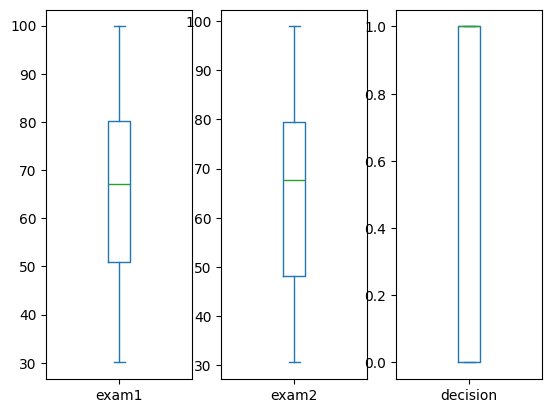

In [2]:
data = pandas.read_csv('acceptance_data.txt', names = ['exam1','exam2','decision'])

# 1. Analyze the dataset
print(data.describe())
data.plot(kind='box', subplots=True)
plot.show()

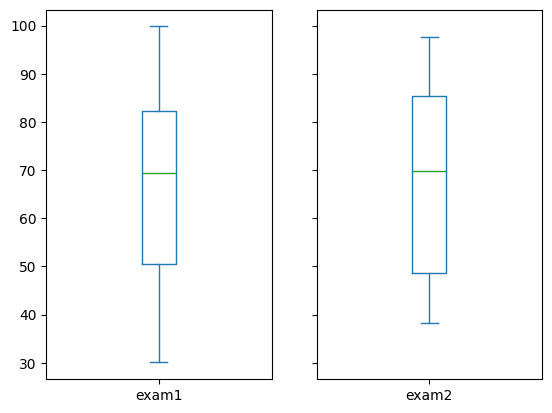

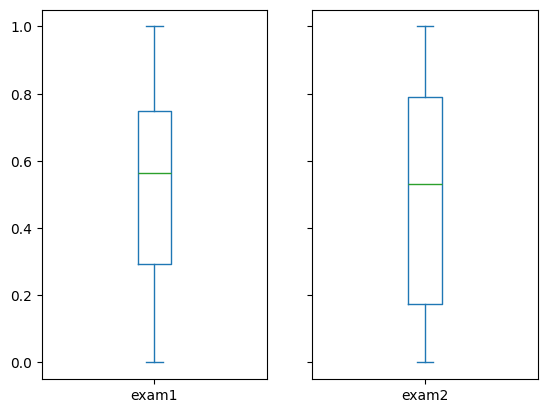

In [ ]:
# 2. Perform data preprocessing & Split the data into train and test sets
X = data.drop(columns=['decision']).round(2)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

X_train.plot(kind='box', subplots=True, sharey=True)
plot.show()

# Min-Max Scaling
xmin = X_train.min()
xmax = X_train.max()
X_train = (X_train - xmin) / (xmax- xmin)
X_test = (X_test - xmin) / (xmax - xmin)

X_train.plot(kind='box', subplots=True, sharey=True)
plot.show()

X_train = X_train.to_numpy().reshape((-1,2))
X_test = X_test.to_numpy().reshape((-1,2))
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [12]:
# 4. Fit the logistic regression model to the training data
model = linear_model.LogisticRegression(solver='sag')
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_, " ", model.intercept_)

Coefficients: 
 [[2.90219478 2.32215029]]   [-2.10474862]


In [13]:
# 5. Evaluate the fitted model on the test data

y_pred = model.predict(X_test)
print('Correct predicitions ratio: %.2f'% model.score(X_test, y_test))

Correct predicitions ratio: 0.88


In [142]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0])

In [14]:
# 6. Generate predictions for new data
new_x = [75,82]
model.predict([(new_x-xmin)/(xmax-xmin)])

array([1])